# Noah Stasuik

## Research question/interests

I'm interested in exploring how a parent's education level affects a child's outcome on standardized exams. I feel that this is an important question to research since it could prove if someone's parents having a formal education gives an unfair advantage when it comes to standardized testing. Many universities around the world rely on standardized testing to determine acceptance and I believe that through selecting this research question I will be able to find if there are biases that exist when it comes to standardized testing.

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('../data/raw/exams.csv')

In [5]:
print(df)

     gender race/ethnicity parental level of education         lunch  \
0      male        group A                 high school      standard   
1    female        group D            some high school  free/reduced   
2      male        group E                some college  free/reduced   
3      male        group B                 high school      standard   
4      male        group E          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                 high school      standard   
996    male        group D          associate's degree  free/reduced   
997  female        group C            some high school  free/reduced   
998  female        group C                some college      standard   
999    male        group A                some college      standard   

    test preparation course  math score  reading score  writing score  
0                 completed          67             67         

## Task 1 - Milestone 3 (Exploritory Data Analysis on the data set) + Task 2 Analysis Pipeline

In [6]:
cols = list(df.columns)
df = df[cols[2:3] + cols[5:8]]
df = df.dropna(axis=0)
df['average score'] = round((df['math score'] + df['reading score'] + df['writing score']) /3, 2)
df['parental education#'] = df['parental level of education']
df['parental education#'] = df['parental education#'].replace(['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree'], [1, 2, 3, 4, 5, 6])
df

#Getting rid of the columns that aren't required to answer my research question, TODO: add a mean column

,parental level of education,math score,reading score,writing score,average score,parental education#
0,high school,67,67,63,65.67,2
1,some high school,40,59,55,51.33,1
2,some college,59,60,50,56.33,3
3,high school,77,78,68,74.33,2
4,associate's degree,78,73,68,73.00,4
...,...,...,...,...,...,...
995,high school,73,70,65,69.33,2
996,associate's degree,85,91,92,89.33,4
997,some high school,32,35,41,36.00,1
998,some college,73,74,82,76.33,3


        math score  reading score  writing score  average score  \
count  1000.000000    1000.000000    1000.000000    1000.000000   
mean     66.396000      69.002000      67.738000      67.712000   
std      15.402871      14.737272      15.600985      14.514123   
min      13.000000      27.000000      23.000000      21.670000   
25%      56.000000      60.000000      58.000000      58.585000   
50%      66.500000      70.000000      68.000000      67.330000   
75%      77.000000      79.000000      79.000000      78.330000   
max     100.000000     100.000000     100.000000     100.000000   

       parental education#  
count          1000.000000  
mean              3.053000  
std               1.498812  
min               1.000000  
25%               2.000000  
50%               3.000000  
75%               4.000000  
max               6.000000  


<AxesSubplot: >

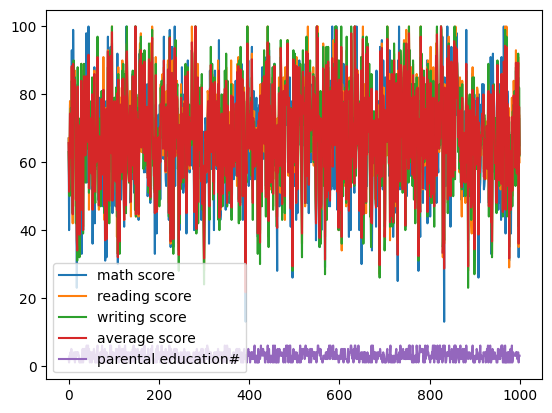

In [7]:
import matplotlib.pylab as plt
import seaborn as sns
print(df.describe())
df.plot()
# This is a test of how the plotting works in python, and is obviously not a useful representation of my data, so I will try a few more plots to
# come up with useful conclusions

In [8]:
#Because the last plot didn't show me much about my data I'm going to look for the correlation that exists so that I can show my data in a better visualization
#First I am going to change the education level to a scale from 1-6 so that correlation can be better recognized
map_dict = {"master's degree": 6, "bachelor's degree": 5, "associate's degree": 4, "some college": 3, "high school": 2, "some high school":1}
df.corr()
#This correlation isn't too useful to what I'm trying to prove, I';m going to switch to doing a barplot and see if that is more helpful in proving my research question of the correlation between parental education and academic scores

C:\Users\NoahS\AppData\Local\Temp\ipykernel_7676\3559443949.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,math score,reading score,writing score,average score,parental education#
math score,1.000000,0.819398,0.805944,0.919836,0.229113
reading score,0.819398,1.000000,0.954274,0.970217,0.224410
writing score,0.805944,0.954274,1.000000,0.966366,0.267894
average score,0.919836,0.970217,0.966366,1.000000,0.252994
parental education#,0.229113,0.224410,0.267894,0.252994,1.000000


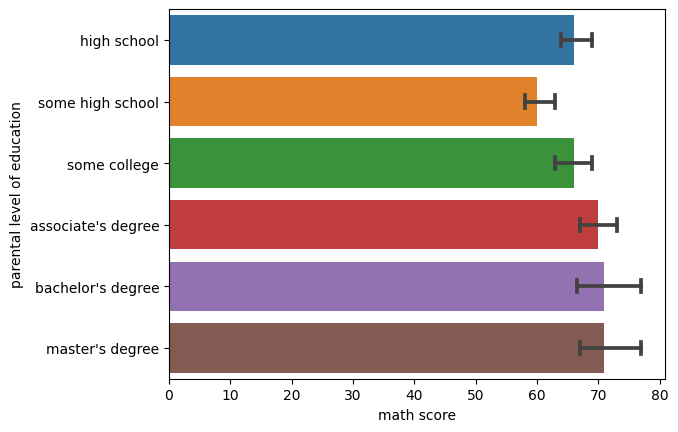

In [9]:
barplotMath = sns.barplot(y="parental level of education", x="math score", data=df, estimator=np.median, capsize=.2)
#This is interesting since I am starting to see the correlation between the parental Education in terms of all the subjects

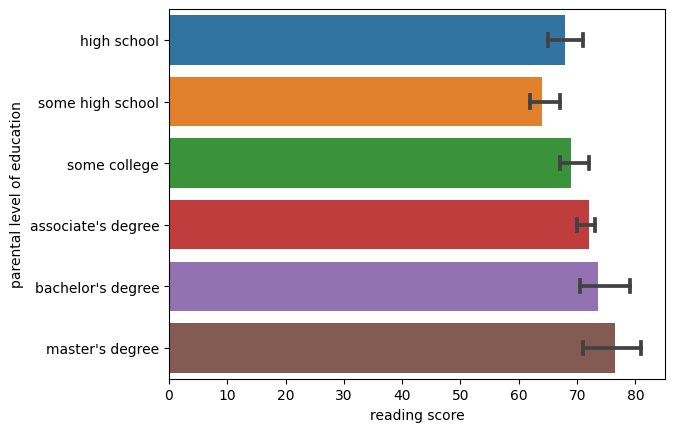

In [10]:
barplotReading = sns.barplot(y="parental level of education", x="reading score", data=df, estimator=np.median, capsize=.2)

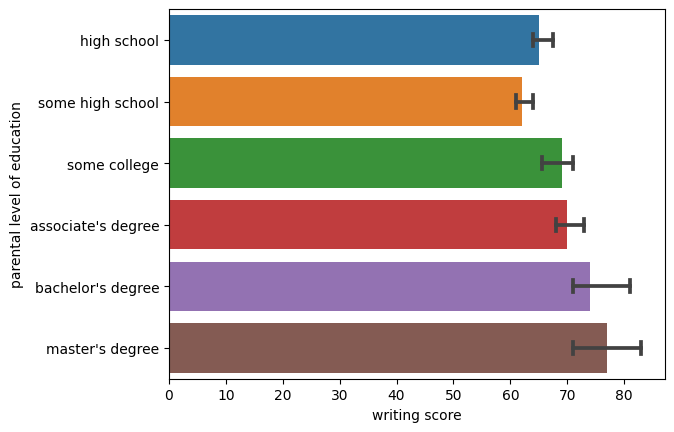

In [11]:
barplotWriting = sns.barplot(y="parental level of education", x="writing score", data=df, estimator=np.median, capsize=.2)

# In my Exploritory data analysis it is becoming evident that the barplot is a very useful tool in visualizing my data

##### As I assumed the parental education did have an effect on the test scores, which is refreshing too see in the data visualizations

# Task 3: Doing everything above, but now with method chaining

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

def load_and_process(df ='../data/raw/exams.csv'):
    df1 = pd.read_csv(df)
    df2 = (
        pd.read_csv(df)
        .drop(columns = ['gender','lunch','race/ethnicity', 'test preparation course'])
        .assign(average_score = round((df1['math score'] + df1['reading score'] + df1['writing score']) /3, 2))
        .dropna()  
        .assign(parental_education_n = df1['parental level of education'].replace(['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree'], [1, 2, 3, 4, 5, 6]))
    )
    return df2

load_and_process()


,parental level of education,math score,reading score,writing score,average_score,parental_education_n
0,high school,67,67,63,65.67,2
1,some high school,40,59,55,51.33,1
2,some college,59,60,50,56.33,3
3,high school,77,78,68,74.33,2
4,associate's degree,78,73,68,73.00,4
...,...,...,...,...,...,...
995,high school,73,70,65,69.33,2
996,associate's degree,85,91,92,89.33,4
997,some high school,32,35,41,36.00,1
998,some college,73,74,82,76.33,3
